## Using Bayesian Inference to Estimate Brightness of Star BD+284211

The Panoramic Survey Telescope & Rapid Response System ([Pan-STARRS](http://legacy.ifa.hawaii.edu/research/Pan-STARRS.shtml)) is a wide-field imaging telescope that is observing the sky repeatedly to conduct a number of Galactic and Extragalactic studies. The data are released periodically, and the catalogs includes measurements in five filters ([grizy](https://outerspace.stsci.edu/display/PANSTARRS/PS1+Filter+properties)) covering 30,000 square degrees of the sky, with typically ~12 epochs for each filter. 

The archive [interface](https://catalogs.mast.stsci.edu/panstarrs/) allows to search the second data release (DR2) and download all the multi-epoch observations for any object covered by the Survey.

The goal of this project is to accurately estimate the flux of the standard star BD+28 4211 using Bayesian Methods. Standard stars are objects whose flux does not change with time (over sufficiently long timescales) and knowing their precise flux is extremely important in astronomy as it is used to remove instrumental effects from astronomical observations. 

The file BD+284211.csv includes repeated flux measurements for BD+28 4211 in the i filter, as a function of time.
The columns are as follows:

- objID      : object identifier	
- filterID	 : filter used for the observations 
- obsTime	 : time of the observation (Modified Julian Date at the midpoint of the observation) in days
- ra	     : Right Ascension of the object 
- dec	     : Declination of the object 
             (RA and Dec are analog of Latitude and longitude)
- psfFlux	 : flux of the star in Jy
- psfFluxErr : measurement error
- infoFlag2  : flag on the measurement [0 = good measurement, 32 = fitted with 2 PSF, problematic]



In [45]:
#Importing packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import random
from astropy.io import ascii
from scipy.stats import norm



1. Visual Inspection of Data

In [25]:
#Looking at head of data
df = pd.read_csv("BD+28 4211 (1).csv")
print(df.head())

                objID  filterID       obsTime          ra        dec  airMass  \
0  142623277801099039         3  55783.533723  327.780210  28.856972  1.10768   
1  142623277801099039         3  55783.545668  327.780254  28.856969  1.14538   
2  142623277801099039         3  56145.539254  327.780176  28.856968  1.09852   
3  142623277801099039         3  56145.550525  327.780095  28.857105  1.13188   
4  142623277801099039         3  55407.562255  327.780157  28.856985  1.10530   

    psfFlux  psfFluxErr  infoFlag2  
0  0.000012    0.000001         32  
1  0.000011    0.000001         32  
2  0.000016    0.000002          0  
3  0.000010    0.000002         32  
4  0.000015    0.000002          0  


In [29]:
#Looking at data summary
flux = df['psfFlux']
time = df['obsTime']
df.describe()

,objID,filterID,obsTime,ra,dec,airMass,psfFlux,psfFluxErr,infoFlag2
count,1.400000e+01,14.0,14.000000,14.000000,14.000000,14.000000,14.000000,1.400000e+01,14.000000
mean,1.426233e+17,3.0,55837.482702,327.780167,28.856981,1.127111,0.000013,1.637749e-06,9.142857
std,1.660398e+01,0.0,387.244694,0.000042,0.000048,0.051441,0.000003,4.457238e-07,15.001831
min,1.426233e+17,3.0,55407.562255,327.780095,28.856902,1.052890,0.000009,1.042840e-06,0.000000
25%,1.426233e+17,3.0,55496.573130,327.780144,28.856963,1.100215,0.000012,1.349368e-06,0.000000
50%,1.426233e+17,3.0,55783.539695,327.780171,28.856973,1.113085,0.000012,1.628565e-06,0.000000
75%,1.426233e+17,3.0,56061.476757,327.780188,28.856981,1.146265,0.000016,1.796310e-06,24.000000
max,1.426233e+17,3.0,56545.307819,327.780254,28.857105,1.254100,0.000017,2.549600e-06,32.000000


Text(0.5, 1.0, 'Observed Flux over Time')

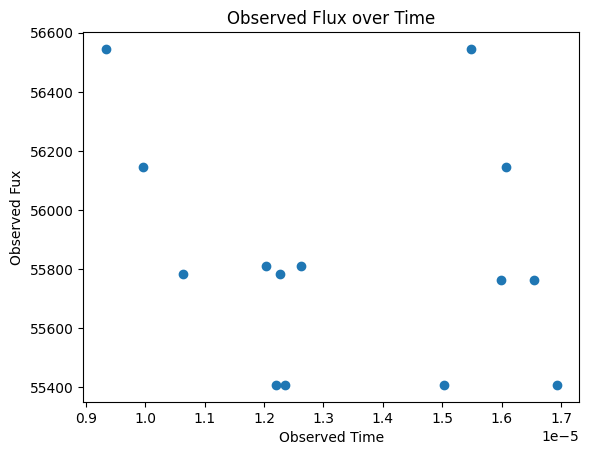

In [30]:
#Plotting flux over time
plt.scatter(flux,time)
plt.xlabel("Observed Time")
plt.ylabel("Observed Fux")
plt.title("Observed Flux over Time")

Text(0.5, 1.0, 'Good Measurements')

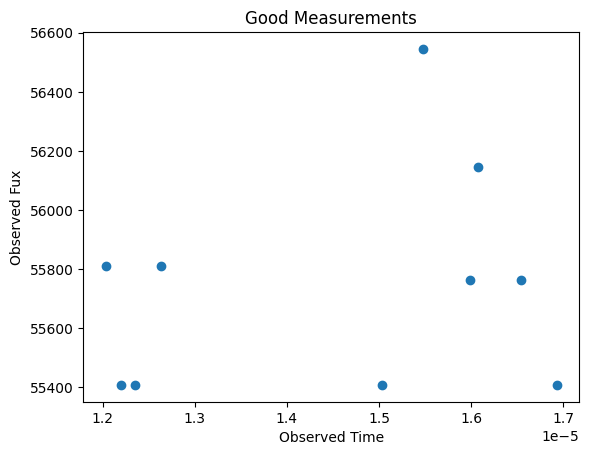

In [31]:
#Plotting Good flags vs problematic flags

#Define "Good" and "Problematic"
good_measurement = df[df['infoFlag2']==0]
problematic_measurement = df[df['infoFlag2']==32] 

plt.scatter(good_measurement['psfFlux'],good_measurement['obsTime'])
plt.xlabel("Observed Time")
plt.ylabel("Observed Fux")
plt.title("Good Measurements")


Text(0.5, 1.0, 'Problematic Measurements')

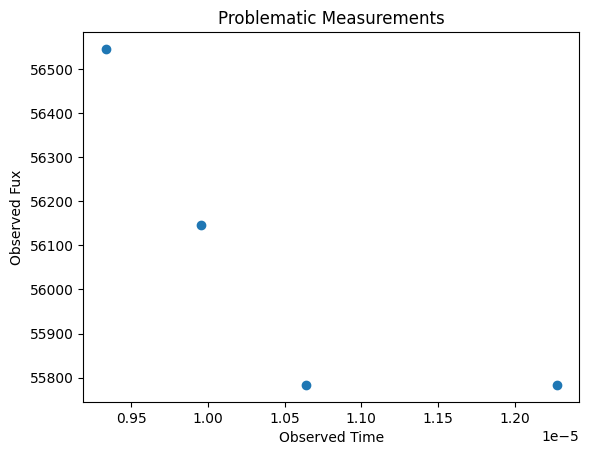

In [32]:
plt.scatter(problematic_measurement['psfFlux'],problematic_measurement['obsTime'])
plt.xlabel("Observed Time")
plt.ylabel("Observed Fux")
plt.title("Problematic Measurements")

array([[<Axes: title={'center': 'psfFlux'}>]], dtype=object)

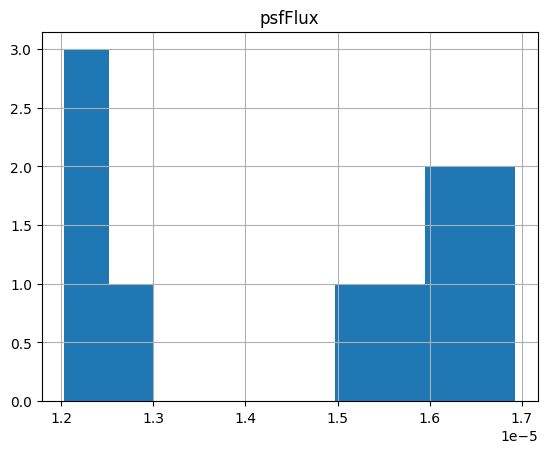

In [33]:
#histograms
good_measurement.hist('psfFlux')

array([[<Axes: title={'center': 'psfFlux'}>]], dtype=object)

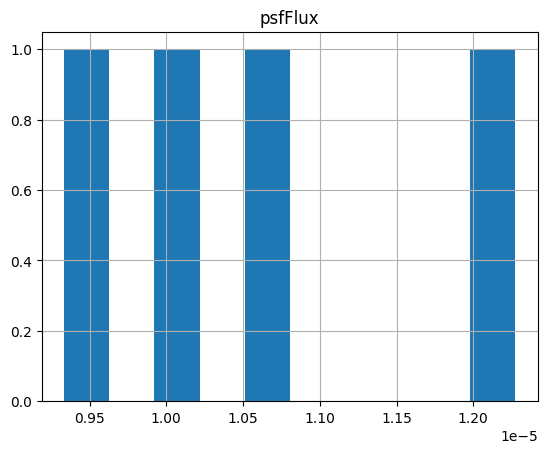

In [35]:
problematic_measurement.hist('psfFlux')

array([[<Axes: title={'center': 'psfFlux'}>]], dtype=object)

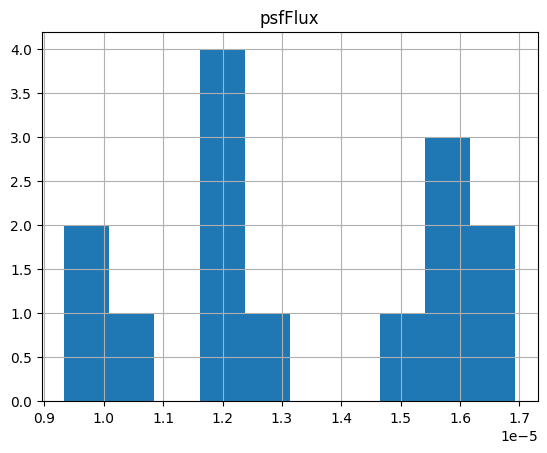

In [36]:
df.hist("psfFlux")

2. Establishing Prior: We decided to use a normal prior distribution, with an assumed mean and variance based on Astrophysicists prior knowledge about star brightness.

In [55]:
#Setting prior mean and variance, and posterior variance based on prior knowledge
v = 0.00001
a = 0.000013
b = 0.00001

#Calculating sample size and sample mean
n = len(df)
sample_mean = np.average(flux)
print("Sample mean:", round(sample_mean,10))
print("Sample size: ", n)

Sample mean: 1.33896e-05
Sample size:  14


3. Calculating Posterior parameters: Mean and Variance

In [56]:
#Calculating posterior mean and variance
post_mean = (n*sample_mean/v) + a/b
post_var = (v*b / (n*b + v))
post_mean = post_mean*post_var
print("Posterior Mean: ", post_mean)
print("Posterior variance: ", post_var)

Posterior Mean:  1.3363670657241404e-05
Posterior variance:  6.666666666666667e-07


4. Plotting posterior function, calculating maximum and 95% confidence interval

95% CI Upper Bound:  0.001613667562775678
95% CI Lower Bound:  -0.0015869402214611955
Maxium (peak) of posterior:  488.60251190291996


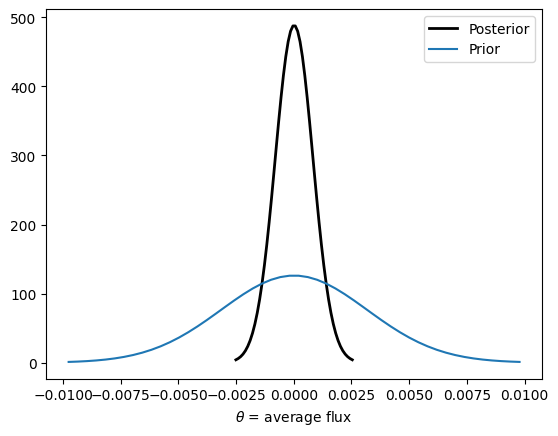

In [58]:
#Creating normal distribution
post_dist = norm(loc=post_mean,scale=np.sqrt(post_var))

#Plotting distribution
xx = np.linspace(norm.ppf(0.001,loc=post_mean,scale=np.sqrt(post_var)),norm.ppf(0.999,loc=post_mean, scale=np.sqrt(post_var)))
yy=np.linspace(norm.ppf(0.001,loc=a,scale=np.sqrt(b)),norm.ppf(0.999,loc=a,scale=np.sqrt(b)))
plt.plot(xx, norm.pdf(xx,loc=post_mean,scale=np.sqrt(post_var)), 'k-', lw=2, label='Posterior')
plt.plot(yy, norm.pdf(yy,loc=a,scale=np.sqrt(b)), label="Prior")
plt.xlabel(r"$\theta}$ = average flux")
plt.legend()
#plt.axvline(norm.ppf(0.95,loc=post_mean,scale=np.sqrt(post_var)), color = "b", ls = "--")

print("95% CI Upper Bound: ", norm.ppf(0.975,loc=post_mean,scale=np.sqrt(post_var)))
print("95% CI Lower Bound: ", norm.ppf(0.025,loc=post_mean,scale=np.sqrt(post_var)))
print("Maxium (peak) of posterior: ", post_dist.pdf(x=post_mean))



Notice that the prior has a much larger variance than the posterior, which could mean that our assumption about variance was wrong

5. Draw random sample of 100 from distribution, plot and compare mean with posterior distribution

In [62]:
np.random.seed(5731)
rand_sample = post_dist.rvs(size=100)
print("Random Sample Average: ",np.average(rand_sample))
print("Difference between random sample and posterior mean: ", np.absolute(post_mean-np.average(rand_sample)))

Random Sample Average:  2.3883091148596942e-05
Difference between random sample and posterior mean:  1.0519420491355538e-05


6. Decisions: 
    - We chose to include the problematic observations in our posterior analysis, because the dataset was already extremely small to begin with. Perhaps this was a bad assumption.
    - We also assumed that the variance was of order 1e-5, because this is in-line with the magnitude of our observations
    

7. Sensitivity analysis: Comparing posterior outcome with different priors. 
    We see that a smaller variance in our prior leads to a more constrained posterior - higher maximum value and smaller variance

Sample mean: 1.33896e-05
Sample size:  14
Posterior Mean:  1.3227294160775877e-05
Posterior variance:  4.166666666666667e-07


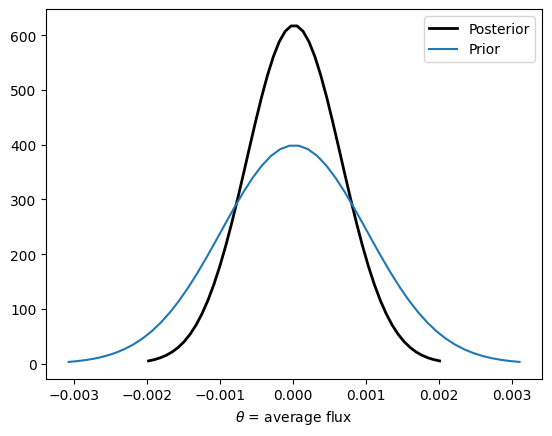

In [52]:
#Change prior variance to be smaller (1e-6 instead of 1e-5)
v = 0.00001
a = 0.000013
b = 0.000001

#Calculating sample size and sample mean
n = len(df)
sample_mean = np.average(flux)
print("Sample mean:", round(sample_mean,10))
print("Sample size: ", n)


#Calculating posterior mean and variance
post_mean = (n*sample_mean/v) + a/b
post_var = (v*b / (n*b + v))
post_mean = post_mean*post_var
print("Posterior Mean: ", post_mean)
print("Posterior variance: ", post_var)

xx = np.linspace(norm.ppf(0.001,loc=post_mean,scale=np.sqrt(post_var)),norm.ppf(0.999,loc=post_mean, scale=np.sqrt(post_var)))
yy=np.linspace(norm.ppf(0.001,loc=a,scale=np.sqrt(b)),norm.ppf(0.999,loc=a,scale=np.sqrt(b)))
plt.plot(xx, norm.pdf(xx,loc=post_mean,scale=np.sqrt(post_var)), 'k-', lw=2, label='Posterior')
plt.plot(yy, norm.pdf(yy,loc=a,scale=np.sqrt(b)), label="Prior")
plt.xlabel(r"$\theta}$ = average flux")
plt.legend()